<a href="https://colab.research.google.com/github/cjakuc/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/module3-Intro-to-Keras/LS_DS_423_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import Normalizer


(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

normalizer = Normalizer()
x_train_norm = normalizer.fit_transform(x_train)
x_test_norm = normalizer.fit_transform(x_test)

57344/57026 [==============================] - 0s 0us/step


In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

inputs = x_train.shape[1]
epochs = 50


# Create Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(inputs,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics='mse')

# Fit Model
model = model.fit(x_train_norm, y_train, 
          validation_data=(x_test_norm,y_test), 
          epochs=epochs, 
         )

Epoch 1/50
13/13 [==============================] - 0s 15ms/step - loss: 578.6195 - mse: 578.4982 - val_loss: 678.9171 - val_mse: 595.7341
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 554.8103 - mse: 557.3526 - val_loss: 654.6890 - val_mse: 573.0217
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 531.7999 - mse: 531.6956 - val_loss: 620.7488 - val_mse: 541.2811
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 495.3331 - mse: 495.6227 - val_loss: 571.4813 - val_mse: 495.4552
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 448.3961 - mse: 443.6695 - val_loss: 504.2708 - val_mse: 433.2201
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 373.3496 - mse: 377.2157 - val_loss: 418.9734 - val_mse: 354.8531
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 296.3568 - mse: 296.4619 - val_loss: 323.9203 - val_mse: 268.6985
Epoch 8/50
13/13 [===============

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


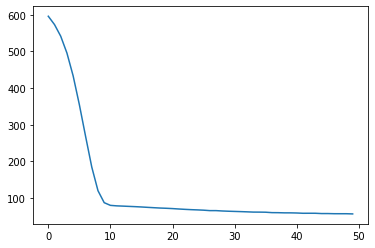

In [3]:
import numpy as np
import seaborn as sns

mse = np.array(model.history['val_mse'])
epochs = np.array(model.epoch)

sns.lineplot(x=epochs,y=mse);

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

lr_mse = mean_squared_error(y_test, y_pred)
lr_mse

23.195599256422906

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 10)
(10000, 10)


In [0]:
from tensorflow.keras.layers import Flatten


model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(28, activation="sigmoid"),
    Dense(1, activation="sigmoid")
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x=x_train, 
        y=y_train, 
        epochs=5)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.